# Create heatmaps of transcriptomics data 

In [13]:
import pandas as pd
import cobra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
import numpy as np
from funcs_transcripto import comp_genes_transcripto, dataframe_diff_expression

In [14]:
wd = '/Users/aalarcon/Documents/Jupyter/3_Isopropanol/'

In [15]:
model = cobra.io.read_sbml_model('/Users/aalarcon/Documents/Jupyter/3_Isopropanol/input/model_PKT_iprop.xml')

### 1. Heatmaps Comparison for a set of genes

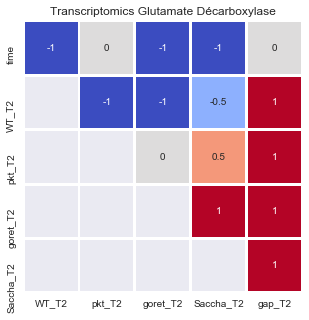

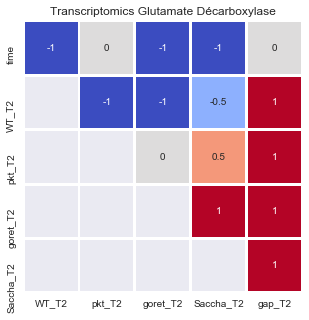

In [16]:
comp_genes_transcripto(['b3517', 'b1493'], plot=True, title_plot='Transcriptomics Glutamate Décarboxylase')

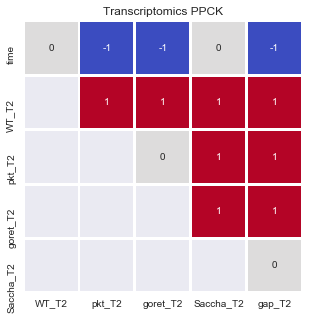

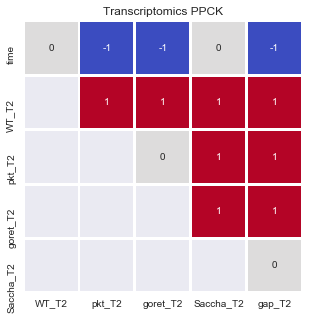

In [17]:
comp_genes_transcripto(['b3403'], plot=True, 
                       title_plot='Transcriptomics PPCK')

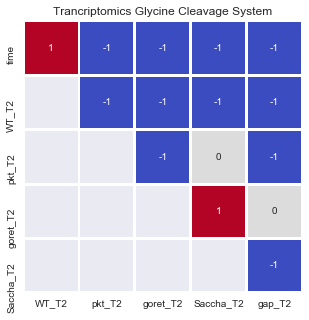

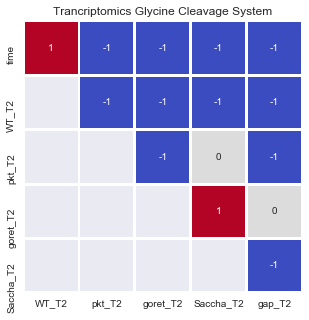

In [18]:
comp_genes_transcripto(['b2903', 'b2904', 'b2905'], plot=True, 
                       title_plot='Trancriptomics Glycine Cleavage System')

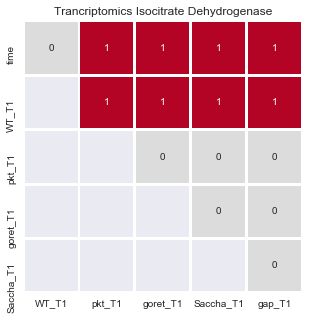

In [19]:
fig = comp_genes_transcripto(['b1136'], time='T1', plot=True, 
                       title_plot='Trancriptomics Isocitrate Dehydrogenase')

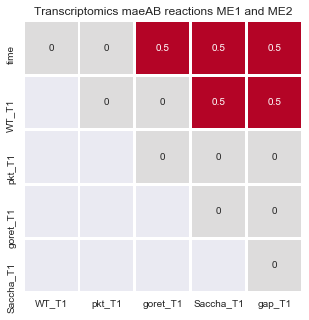

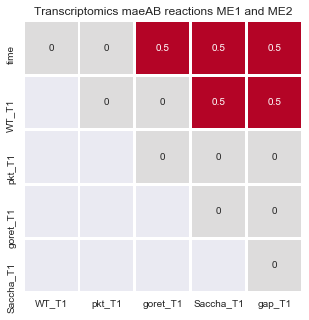

In [20]:
comp_genes_transcripto(['b1479', 'b2463'], time='T1', plot=True, 
                       title_plot='Transcriptomics maeAB reactions ME1 and ME2')

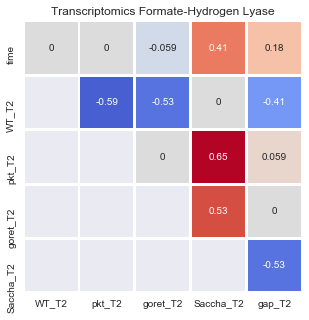

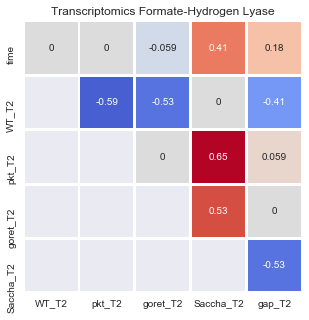

In [21]:
genes_FHL = [g.id for g in model.reactions.FHL.genes]
comp_genes_transcripto(genes_FHL, time='T2', plot=True, title_plot='Transcriptomics Formate-Hydrogen Lyase')

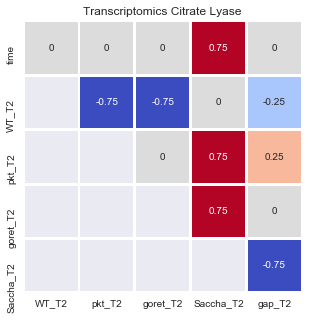

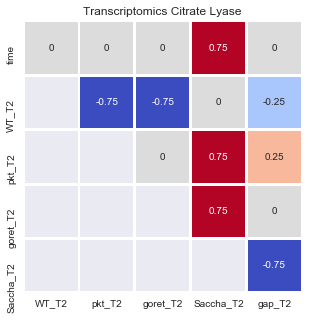

In [22]:
genes_CITL = [g.id for g in model.reactions.CITL.genes]
comp_genes_transcripto(genes_CITL, time='T2', plot=True, title_plot='Transcriptomics Citrate Lyase')

### 2. Heatmap with hierarchical clustering

#### Recuperate genes participating in co2 reactions

In [23]:
df_tr = pd.read_excel(wd+'files/Data_transcripto2.xlsx', sheetname='All', index_col=0)

In [24]:
loci_co2 = list()
for r in model.reactions:
    r_mets = [m.id for m in r.metabolites.keys()]
    if r_mets.count('co2_c')>0:
        loci_co2 += [g.id for g in r.genes]
loci_co2 = set(loci_co2)
len(loci_co2)

96

In [25]:
scen = list()
for souche in ['WT', 'PKT', 'Goret', 'Saccha', 'GAP']:
    for T in ['T1', 'T2']:
        for R in ['R1', 'R2']:
            scen.append(souche + '_' + T + '_' + R)
len(scen)

20

In [26]:
df_out = df_tr.loc[loci_co2, scen]
df_out = df_out[scen].apply(lambda x: np.log2(x+1))
df_out.dropna(inplace=True)
df_out.index = list(map(lambda x:df_tr.loc[x,'Gene_name'], df_out.index))
df_out_T2 = df_out[[x for x in scen if x.split('_')[1]=='T2']]
df_out_T1 = df_out[[x for x in scen if x.split('_')[1]=='T1']]

In [27]:
len(df_out.index.unique())

94

/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171 UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.


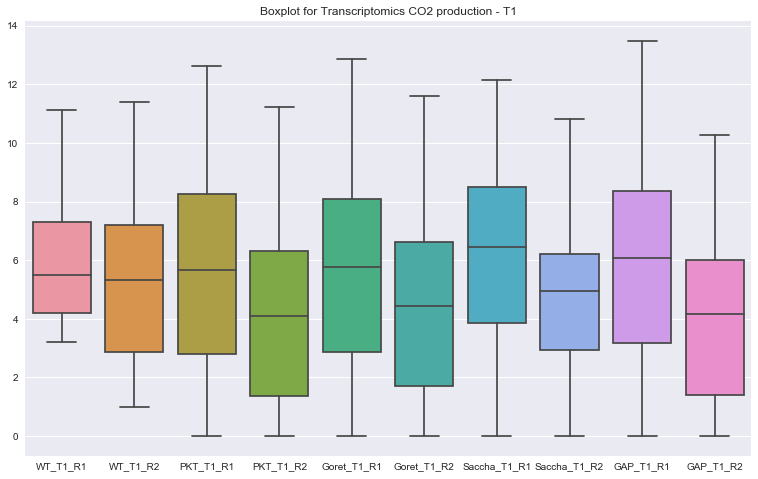

In [28]:
fig = plt.figure(figsize=(13,8))
sns.boxplot(df_out_T1)
plt.title('Boxplot for Transcriptomics CO2 production - T1')


/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171 UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.


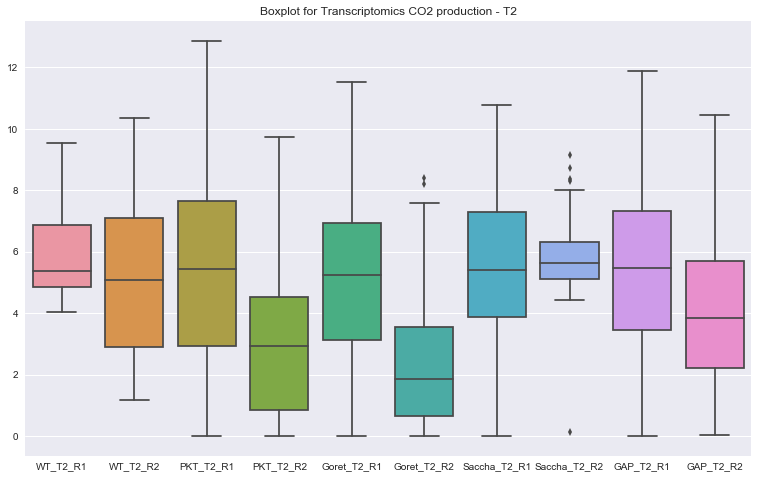

In [40]:
fig = plt.figure(figsize=(13,8))
sns.boxplot(df_out_T2)
plt.title('Boxplot for Transcriptomics CO2 production - T2')
fig.savefig('/Users/aalarcon/Documents/Présentations/2_Decarboxylases/figures/boxplot_T2.png')

In [30]:
df_out.describe()

,WT_T1_R1,WT_T1_R2,WT_T2_R1,WT_T2_R2,PKT_T1_R1,PKT_T1_R2,PKT_T2_R1,PKT_T2_R2,Goret_T1_R1,Goret_T1_R2,Goret_T2_R1,Goret_T2_R2,Saccha_T1_R1,Saccha_T1_R2,Saccha_T2_R1,Saccha_T2_R2,GAP_T1_R1,GAP_T1_R2,GAP_T2_R1,GAP_T2_R2
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,5.968048,5.357000,5.914679,5.096655,5.591270,4.160160,5.507927,3.059848,5.698506,4.385283,5.321657,2.533153,6.097879,4.734292,5.647654,5.833081,5.893473,4.084117,5.680763,4.277762
std,1.997204,2.728456,1.399572,2.524767,3.070075,2.803607,2.925349,2.497357,3.111309,2.891826,2.731350,2.265750,2.768788,2.461225,2.236073,1.195908,3.054640,2.745538,2.766378,2.600514
min,3.190964,0.979947,4.039735,1.177069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144693,0.000000,0.000000,0.000000,0.042941
25%,4.195974,2.851500,4.848396,2.898805,2.794341,1.364402,2.934340,0.851807,2.863881,1.701379,3.125653,0.665538,3.840933,2.930996,3.881815,5.123465,3.170023,1.383491,3.465321,2.216051
50%,5.499143,5.332463,5.370931,5.086856,5.662735,4.089460,5.424123,2.918893,5.771243,4.438269,5.238394,1.852870,6.450786,4.933608,5.394315,5.626763,6.057539,4.167561,5.478318,3.850617
75%,7.291153,7.182840,6.865389,7.094138,8.255847,6.318480,7.651999,4.521768,8.091472,6.622574,6.922017,3.548422,8.496291,6.213219,7.290920,6.297077,8.359886,5.998694,7.307101,5.698367
max,11.111781,11.386590,9.521844,10.350497,12.613239,11.232367,12.863013,9.735126,12.878352,11.596460,11.530553,8.408279,12.160839,10.807983,10.765999,9.144049,13.486898,10.261531,11.890074,10.447610


/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171 UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.


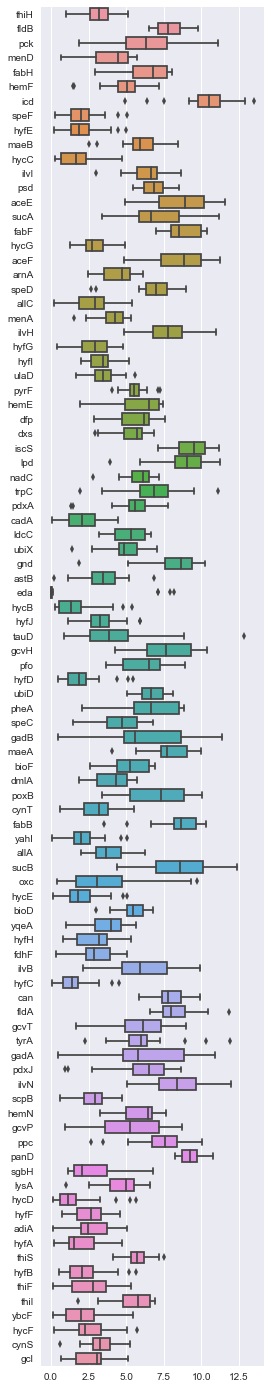

In [31]:
plt.figure(figsize=(4,25))
sns.boxplot(df_out.transpose(), orient='h')

/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171 UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.


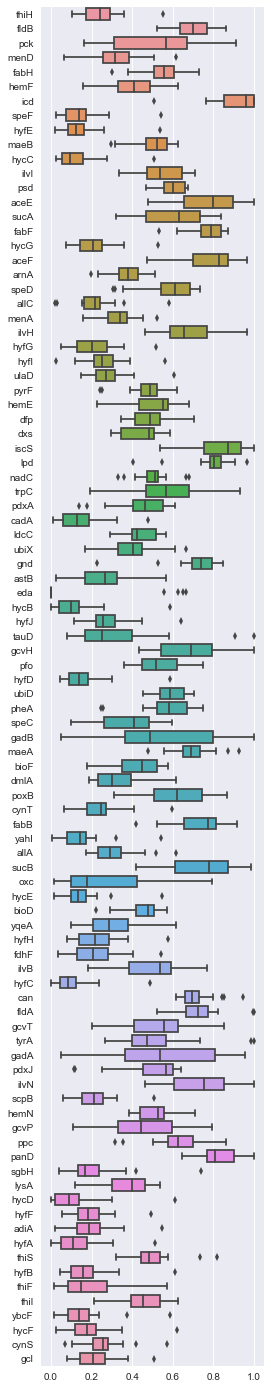

In [32]:
df_out2 = pd.DataFrame(index=df_out.index)
plt.figure(figsize=(15,10))

for col in df_out.columns:
    col_data = df_out[col].apply(lambda x:(x-min(df_out[col]))/(max(df_out[col])-min(df_out[col])))
    df_out2[col] = col_data

plt.figure(figsize=(4,25))
sns.boxplot(df_out2.transpose(), orient='h')

### Cluster Map with real values

/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/matplotlib/cbook.py:136 MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.


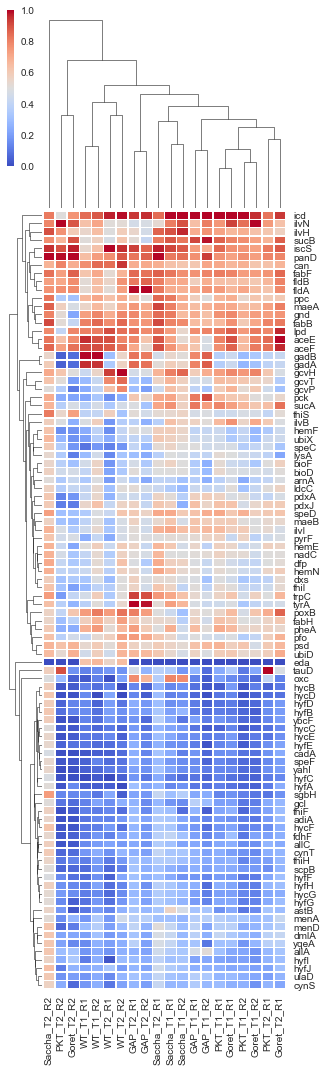

In [33]:
cg = sns.clustermap(df_out, cmap='coolwarm', figsize=(5,18), standard_scale=1, linecolor='white', linewidth=0.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
cg.savefig(wd+'output/figs/heatmap_co2_prod.png')

### Cluster Map with Differentially Expressed Data

In [34]:
df_tr1 = dataframe_diff_expression(time='T1')
df_tr2 = dataframe_diff_expression(time='T2')
df_tr1 = df_tr1.loc[loci_co2]
df_tr2 = df_tr2.loc[loci_co2]
df_tr1.set_index('Gene_name', inplace=True)
df_tr2.set_index('Gene_name', inplace=True)
df_tr1.dropna(inplace=True)
df_tr2.dropna(inplace=True)

### T1

/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/matplotlib/cbook.py:136 MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.


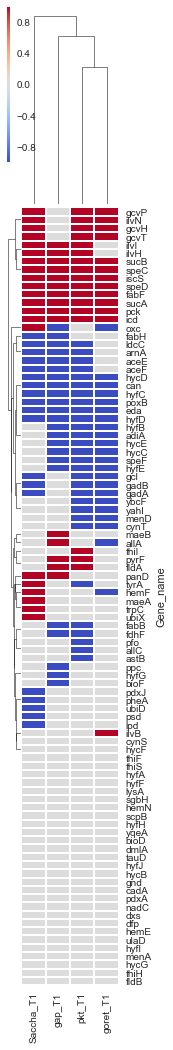

In [35]:
cg = sns.clustermap(df_tr1, cmap='coolwarm', figsize=(2,18), linecolor='white', linewidth=1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
cg.savefig(wd+'output/figs/clust_co2_prod_expr_T1.png')

### T2

/Users/aalarcon/anaconda/envs/cameo3.4/lib/python3.4/site-packages/matplotlib/cbook.py:136 MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.


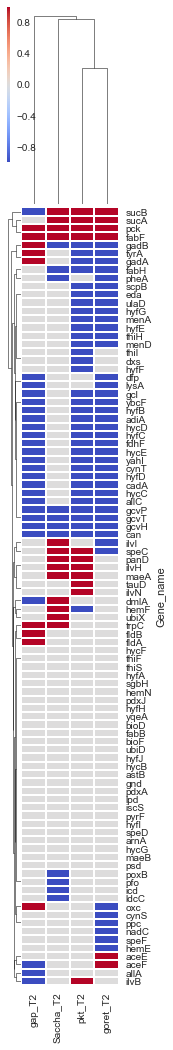

In [36]:
cg = sns.clustermap(df_tr2, cmap='coolwarm', figsize=(2,18), linecolor='white', linewidth=1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
cg.savefig(wd+'output/figs/clust_co2_prod_expr_T2.png')

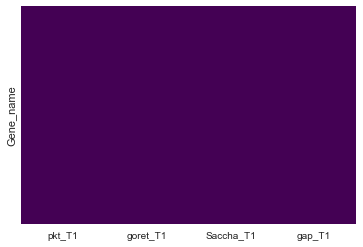

In [37]:
sns.heatmap(df_tr1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
type(cg)

seaborn.matrix.ClusterGrid

In [39]:
which pandas

SyntaxError: invalid syntax (<ipython-input-39-5c42137149d4>, line 1)